In [13]:
import numpy as np

# Cargar los archivos .npy
X_trad = np.load('X_trad.npy')
image_ids = np.load('image_ids.npy', allow_pickle=True)

C:\Users\eduar\PycharmProjects\MLproject2\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


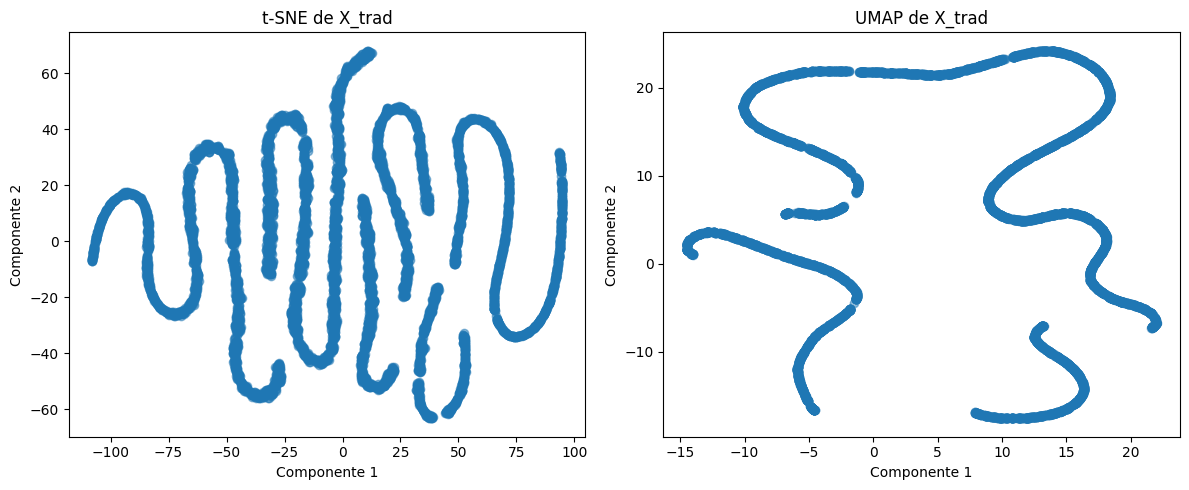

In [14]:
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

# Aplicar t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_trad)

# Aplicar UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_trad)

# Visualizar t-SNE
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.5)
plt.title('t-SNE de X_trad')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')

# Visualizar UMAP
plt.subplot(1, 2, 2)
plt.scatter(X_umap[:, 0], X_umap[:, 1], alpha=0.5)
plt.title('UMAP de X_trad')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')

plt.tight_layout()
plt.show()


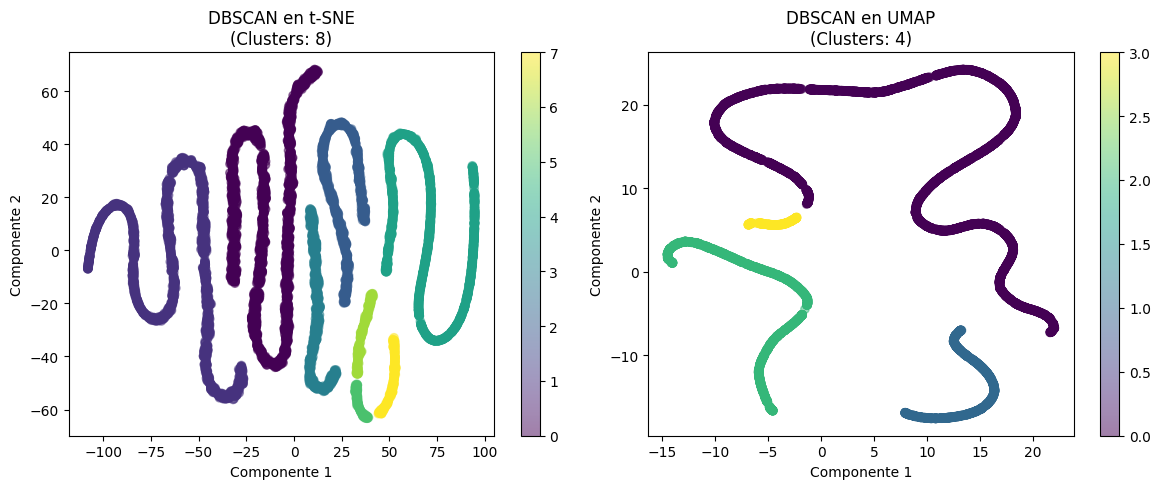

t-SNE - Clusters encontrados: 8
t-SNE - Puntos de ruido: 0

UMAP - Clusters encontrados: 4
UMAP - Puntos de ruido: 0


In [15]:
from sklearn.cluster import DBSCAN

# DBSCAN en t-SNE
dbscan_tsne = DBSCAN(eps=3, min_samples=5)
clusters_tsne = dbscan_tsne.fit_predict(X_tsne)

# DBSCAN en UMAP
dbscan_umap = DBSCAN(eps=1, min_samples=5)
clusters_umap = dbscan_umap.fit_predict(X_umap)

# Visualizar resultados
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters_tsne, cmap='viridis', alpha=0.5)
plt.colorbar(scatter)
plt.title(f'DBSCAN en t-SNE\n(Clusters: {len(set(clusters_tsne)) - (1 if -1 in clusters_tsne else 0)})')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')

plt.subplot(1, 2, 2)
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=clusters_umap, cmap='viridis', alpha=0.5)
plt.colorbar(scatter)
plt.title(f'DBSCAN en UMAP\n(Clusters: {len(set(clusters_umap)) - (1 if -1 in clusters_umap else 0)})')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')

plt.tight_layout()
plt.show()

print(f"t-SNE - Clusters encontrados: {len(set(clusters_tsne)) - (1 if -1 in clusters_tsne else 0)}")
print(f"t-SNE - Puntos de ruido: {sum(clusters_tsne == -1)}")
print(f"\nUMAP - Clusters encontrados: {len(set(clusters_umap)) - (1 if -1 in clusters_umap else 0)}")
print(f"UMAP - Puntos de ruido: {sum(clusters_umap == -1)}")


In [16]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
def hopkins(X, m=None, random_state=42):
    """
    Calcula el estadístico de Hopkins para medir tendencia a clustering.
    X: numpy array (n_samples, n_features)
    m: número de puntos de muestra (por defecto sqrt(n))
    """
    np.random.seed(random_state)
    n, d = X.shape
    if m is None:
        m = int(np.sqrt(n))

    # 1. Muestra aleatoria de puntos reales
    X_sample = X[np.random.choice(n, m, replace=False)]

    # 2. Puntos aleatorios dentro del espacio del dataset
    mins, maxs = np.min(X, axis=0), np.max(X, axis=0)
    U_random = np.random.uniform(mins, maxs, (m, d))

    # 3. Distancias
    nbrs_X = NearestNeighbors(n_neighbors=2).fit(X)
    u_dist, _ = nbrs_X.kneighbors(X_sample)
    u_dist = u_dist[:, 1]  # segundo vecino, el primero es el mismo punto

    nbrs_U = NearestNeighbors(n_neighbors=1).fit(X)
    w_dist, _ = nbrs_U.kneighbors(U_random)
    w_dist = w_dist[:, 0]

    # 4. Cálculo del estadístico
    H = np.sum(w_dist) / (np.sum(w_dist) + np.sum(u_dist))
    return H

In [17]:
# Calcular Hopkins statistic para datos originales y reducidos
H_original = hopkins(X_trad)
H_tsne = hopkins(X_tsne)
H_umap = hopkins(X_umap)

print(f"Hopkins statistic (Datos originales): {H_original:.3f}")
print(f"Hopkins statistic (t-SNE): {H_tsne:.3f}")
print(f"Hopkins statistic (UMAP): {H_umap:.3f}")


Hopkins statistic (Datos originales): 0.995
Hopkins statistic (t-SNE): 0.974
Hopkins statistic (UMAP): 0.995


In [18]:
# Obtener los IDs de cada cluster de DBSCAN en UMAP
unique_clusters = np.unique(clusters_umap)
for cluster_id in unique_clusters:
    cluster_indices = np.where(clusters_umap == cluster_id)[0]
    cluster_ids = image_ids[cluster_indices]
    if cluster_id == -1:
        print(f"\nIDs del ruido (cluster {cluster_id}) de DBSCAN en UMAP ({len(cluster_ids)} imágenes):")
    else:
        print(f"\nIDs del cluster {cluster_id} de DBSCAN en UMAP ({len(cluster_ids)} imágenes):")
    print(cluster_ids)



IDs del cluster 0 de DBSCAN en UMAP (4086 imágenes):
['10' '100106' '100159' ... '99764' '99846' '99992']

IDs del cluster 1 de DBSCAN en UMAP (838 imágenes):
['100044' '100277' '100810' '101' '1012' '1014' '102' '102481' '103042'
 '103543' '103980' '104243' '104283' '1043' '104457' '105355' '1056'
 '105731' '106144' '106696' '106920' '107141' '107159' '1097' '110281'
 '110586' '110611' '111364' '1124' '112556' '113532' '113565' '113741'
 '113780' '113829' '114044' '114627' '114670' '114713' '114925' '1150'
 '115149' '115617' '116985' '117533' '118166' '1183' '1184' '119153'
 '1196' '1208' '1211' '1212' '1214' '1217' '1238' '123947' '124404'
 '124853' '1250' '1257' '126' '126426' '127052' '127130' '127184' '127319'
 '127390' '1282' '1286' '128838' '1300' '130073' '1306' '131934' '132'
 '1324' '132800' '133780' '134248' '134252' '134393' '135198' '1353'
 '135937' '136564' '1366' '137' '1376' '1382' '138702' '139052' '139157'
 '1392' '1393' '139385' '1397' '14' '1401' '140162' '140301' 

In [19]:
import pandas as pd

# Leer el archivo movies_train.csv
movies_train = pd.read_csv('LDA_UMAP_DBSCAN/movies_train.csv')

# Crear un DataFrame con los clusters UMAP y los movieIds
cluster_df = pd.DataFrame({
    'movieId': image_ids.astype(int),
    'cluster': clusters_umap
})

# Unir con los datos de movies_train
clusters_con_data = cluster_df.merge(movies_train, on='movieId', how='left')

# Mostrar el resultado
clusters_con_data


,movieId,cluster,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,10,0,GoldenEye (1995),Action|Adventure|Thriller,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,100044,1,Human Planet (2011),Documentary,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,100106,0,"Pervert's Guide to Ideology, The (2012)",Documentary,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,100159,0,Sightseers (2012),Comedy,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,100163,0,Hansel & Gretel: Witch Hunters (2013),Action|Fantasy|Horror|IMAX,0,1,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6335,99764,0,It's Such a Beautiful Day (2012),Animation|Comedy|Drama|Fantasy|Sci-Fi,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
6336,99846,0,Everything or Nothing: The Untold Story of 007...,Documentary,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6337,99853,1,Codependent Lesbian Space Alien Seeks Same (2011),Comedy|Romance|Sci-Fi,0,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
6338,999,2,2 Days in the Valley (1996),Crime|Film-Noir,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


COMPARACIÓN DE COMBINACIONES DE GÉNEROS ENTRE CLUSTERS

CLUSTER 0 - 4086 películas

Top 10 combinaciones de géneros:
Combinación                              Películas  % del cluster
--------------------------------------------------------------------------------
Comedy + Drama                          451        11.04%
Comedy + Romance                        432        10.57%
Drama + Romance                        418        10.23%
Drama + Thriller                       369        9.03%
Crime + Drama                          266        6.51%
Action + Thriller                       265        6.49%
Action + Adventure                      259        6.34%
Crime + Thriller                       255        6.24%
Action + Drama                          226        5.53%
Action + Comedy                         202        4.94%

CLUSTER 1 - 840 películas

Top 10 combinaciones de géneros:
Combinación                              Películas  % del cluster
----------------------------------------

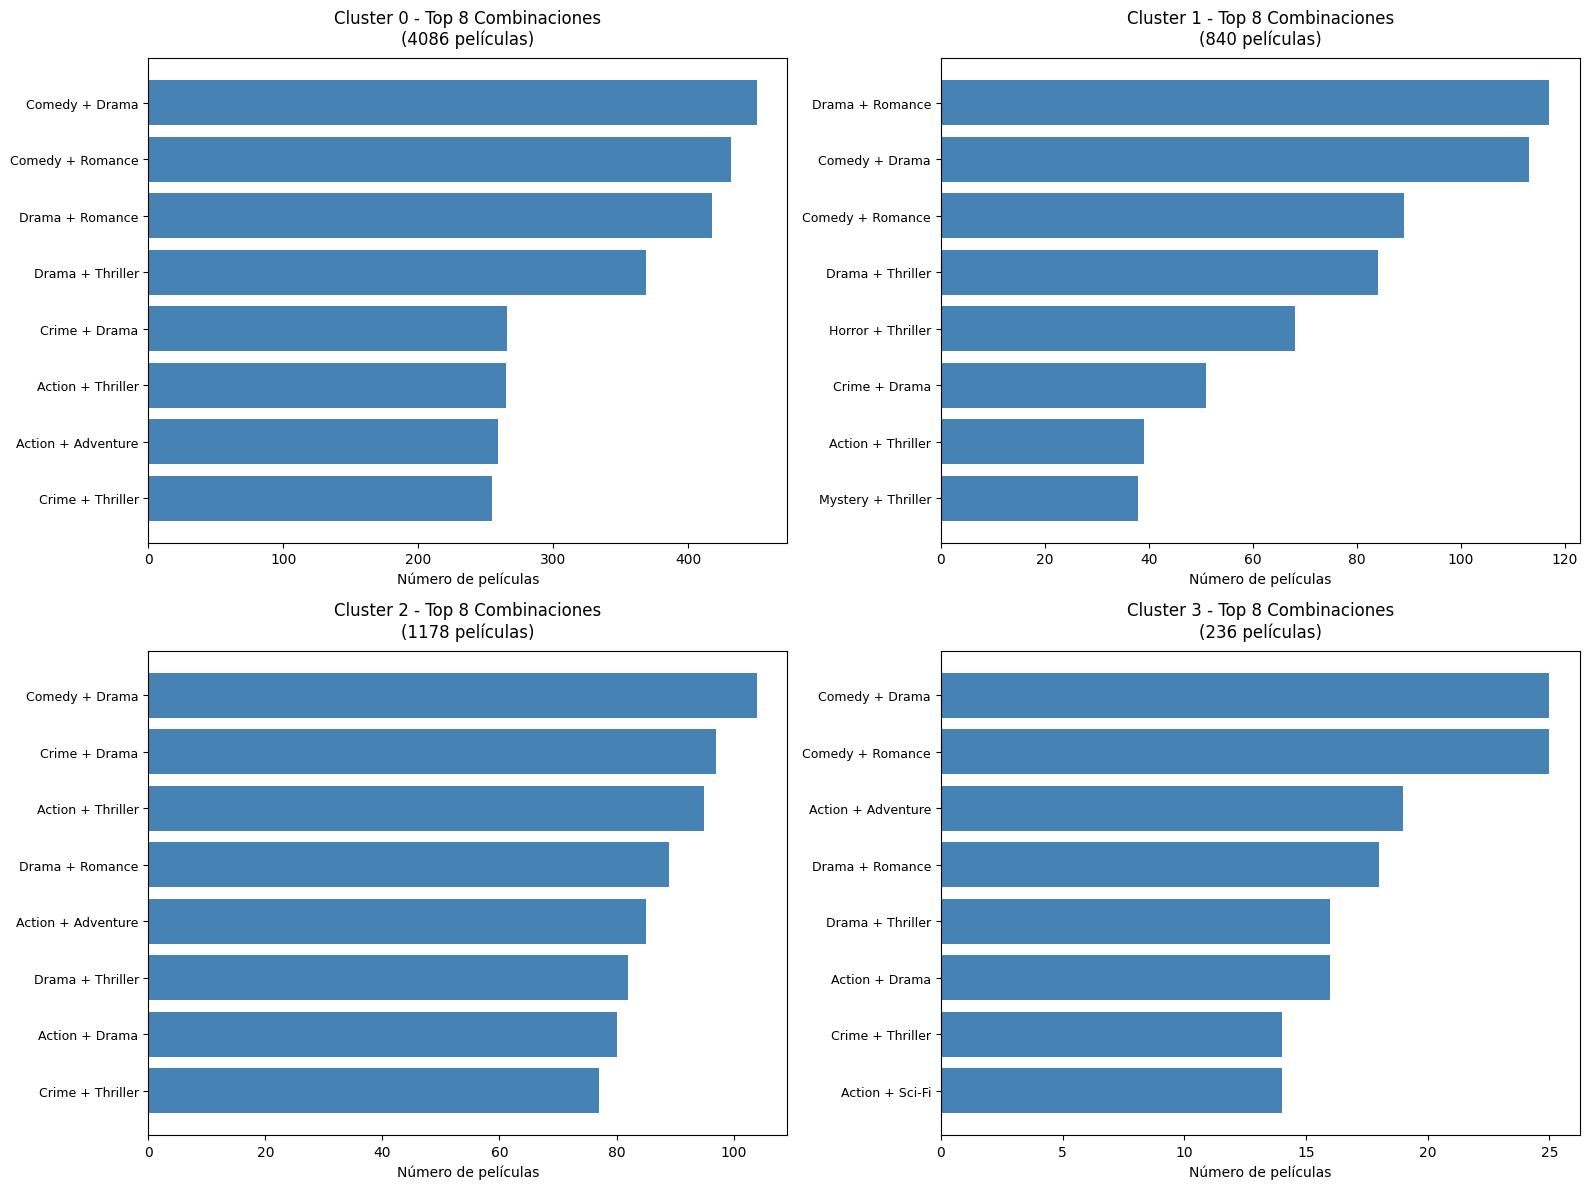

In [28]:
# Comparación de combinaciones de géneros entre clusters
import matplotlib.pyplot as plt
import seaborn as sns

genre_columns = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
                 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX',
                 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

print("=" * 80)
print("COMPARACIÓN DE COMBINACIONES DE GÉNEROS ENTRE CLUSTERS")
print("=" * 80)

# Analizar cada cluster
for cluster_id in sorted(clusters_con_data['cluster'].unique()):
    if cluster_id == -1:
        continue  # Saltar ruido

    cluster_data = clusters_con_data[clusters_con_data['cluster'] == cluster_id]

    print(f"\n{'=' * 80}")
    print(f"CLUSTER {cluster_id} - {len(cluster_data)} películas")
    print(f"{'=' * 80}")

    # Calcular combinaciones de géneros para este cluster
    cluster_genre_pairs = {}
    for _, row in cluster_data.iterrows():
        active_genres = [g for g in genre_columns if row[g] == 1]
        if len(active_genres) >= 2:
            for i in range(len(active_genres)):
                for j in range(i + 1, len(active_genres)):
                    pair = tuple(sorted([active_genres[i], active_genres[j]]))
                    cluster_genre_pairs[pair] = cluster_genre_pairs.get(pair, 0) + 1

    # Top 10 combinaciones de este cluster
    sorted_cluster_pairs = sorted(cluster_genre_pairs.items(), key=lambda x: x[1], reverse=True)[:10]

    print(f"\nTop 10 combinaciones de géneros:")
    print(f"{'Combinación':<40} {'Películas':<10} {'% del cluster'}")
    print("-" * 80)
    for pair, count in sorted_cluster_pairs:
        percentage = (count / len(cluster_data)) * 100
        print(f"{pair[0]} + {pair[1]:<30} {count:<10} {percentage:.2f}%")

# Visualización comparativa
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, cluster_id in enumerate(sorted([c for c in clusters_con_data['cluster'].unique() if c != -1])):
    cluster_data = clusters_con_data[clusters_con_data['cluster'] == cluster_id]

    # Calcular combinaciones
    cluster_genre_pairs = {}
    for _, row in cluster_data.iterrows():
        active_genres = [g for g in genre_columns if row[g] == 1]
        if len(active_genres) >= 2:
            for i in range(len(active_genres)):
                for j in range(i + 1, len(active_genres)):
                    pair = tuple(sorted([active_genres[i], active_genres[j]]))
                    cluster_genre_pairs[pair] = cluster_genre_pairs.get(pair, 0) + 1

    # Top 8 para visualización
    sorted_cluster_pairs = sorted(cluster_genre_pairs.items(), key=lambda x: x[1], reverse=True)[:8]
    pair_labels = [f"{p[0]} + {p[1]}" for p, _ in sorted_cluster_pairs]
    pair_counts = [count for _, count in sorted_cluster_pairs]

    axes[idx].barh(range(len(pair_labels)), pair_counts, color='steelblue')
    axes[idx].set_yticks(range(len(pair_labels)))
    axes[idx].set_yticklabels(pair_labels, fontsize=9)
    axes[idx].set_xlabel('Número de películas')
    axes[idx].set_title(f'Cluster {cluster_id} - Top 8 Combinaciones\n({len(cluster_data)} películas)',
                        fontsize=12, pad=10)
    axes[idx].invert_yaxis()

plt.tight_layout()
plt.show()


In [ ]:
# Obtener los IDs de cada cluster de DBSCAN en t-SNE
unique_clusters_tsne = np.unique(clusters_tsne)
for cluster_id in unique_clusters_tsne:
    cluster_indices = np.where(clusters_tsne == cluster_id)[0]
    cluster_ids = image_ids[cluster_indices]
    if cluster_id == -1:
        print(f"\nIDs del ruido (cluster {cluster_id}) de DBSCAN en t-SNE ({len(cluster_ids)} imágenes):")
    else:
        print(f"\nIDs del cluster {cluster_id} de DBSCAN en t-SNE ({len(cluster_ids)} imágenes):")
    print(cluster_ids)


In [22]:
# Crear un DataFrame con los clusters t-SNE y los movieIds
cluster_tsne_df = pd.DataFrame({
    'movieId': image_ids.astype(int),
    'cluster': clusters_tsne
})

# Unir con los datos de movies_train
clusters_tsne_con_data = cluster_tsne_df.merge(movies_train, on='movieId', how='left')

# Análisis por cluster para t-SNE
for cluster_id in sorted(clusters_tsne_con_data['cluster'].unique()):
    cluster_data = clusters_tsne_con_data[clusters_tsne_con_data['cluster'] == cluster_id]

    if cluster_id == -1:
        print(f"\n{'=' * 60}")
        print(f"RUIDO (Cluster {cluster_id}) - {len(cluster_data)} películas")
        print(f"{'=' * 60}")
    else:
        print(f"\n{'=' * 60}")
        print(f"CLUSTER {cluster_id} - {len(cluster_data)} películas")
        print(f"{'=' * 60}")

    # Sumar la cantidad de películas por género
    genre_counts = cluster_data[genre_columns].sum().sort_values(ascending=False)

    print("\nGéneros más frecuentes:")
    for genre, count in genre_counts[genre_counts > 0].items():
        percentage = (count / len(cluster_data)) * 100
        print(f"  {genre:15s}: {int(count):3d} películas ({percentage:.1f}%)")

    # Mostrar las películas sin género
    no_genre = cluster_data[cluster_data['(no genres listed)'] == 1]
    if len(no_genre) > 0:
        print(f"  {'Sin género':15s}: {len(no_genre):3d} películas ({len(no_genre) / len(cluster_data) * 100:.1f}%)")



CLUSTER 0 - 1750 películas

Géneros más frecuentes:
  Drama          : 821 películas (46.9%)
  Comedy         : 680 películas (38.9%)
  Thriller       : 350 películas (20.0%)
  Romance        : 326 películas (18.6%)
  Action         : 295 películas (16.9%)
  Adventure      : 229 películas (13.1%)
  Crime          : 205 películas (11.7%)
  Horror         : 163 películas (9.3%)
  Fantasy        : 151 películas (8.6%)
  Sci-Fi         : 144 películas (8.2%)
  Children       : 123 películas (7.0%)
  Mystery        : 109 películas (6.2%)
  Animation      :  84 películas (4.8%)
  Documentary    :  69 películas (3.9%)
  War            :  65 películas (3.7%)
  Musical        :  64 películas (3.7%)
  Western        :  25 películas (1.4%)
  IMAX           :  24 películas (1.4%)
  Film-Noir      :  12 películas (0.7%)
  Sin género     :   5 películas (0.3%)

CLUSTER 1 - 1632 películas

Géneros más frecuentes:
  Drama          : 903 películas (55.3%)
  Comedy         : 572 películas (35.0%)
  Rom

In [23]:
# Calcular el porcentaje general de todos los géneros en el dataset completo
total_peliculas = len(movies_train)

print("=" * 60)
print(f"DISTRIBUCIÓN GENERAL DE GÉNEROS - Total: {total_peliculas} películas")
print("=" * 60)

# Sumar la cantidad total de películas por género
genre_counts_general = movies_train[genre_columns].sum().sort_values(ascending=False)

print("\nPorcentaje de películas por género:")
for genre, count in genre_counts_general.items():
    percentage = (count / total_peliculas) * 100
    print(f"  {genre:15s}: {int(count):4d} películas ({percentage:.2f}%)")

# Mostrar películas sin género
no_genre_general = movies_train[movies_train['(no genres listed)'] == 1]
if len(no_genre_general) > 0:
    percentage = (len(no_genre_general) / total_peliculas) * 100
    print(f"  {'Sin género':15s}: {len(no_genre_general):4d} películas ({percentage:.2f}%)")


DISTRIBUCIÓN GENERAL DE GÉNEROS - Total: 6821 películas

Porcentaje de películas por género:
  Drama          : 3059 películas (44.85%)
  Comedy         : 2660 películas (39.00%)
  Thriller       : 1298 películas (19.03%)
  Action         : 1279 películas (18.75%)
  Romance        : 1139 películas (16.70%)
  Adventure      :  895 películas (13.12%)
  Crime          :  833 películas (12.21%)
  Sci-Fi         :  668 películas (9.79%)
  Horror         :  665 películas (9.75%)
  Fantasy        :  554 películas (8.12%)
  Children       :  468 películas (6.86%)
  Animation      :  421 películas (6.17%)
  Mystery        :  406 películas (5.95%)
  Documentary    :  321 películas (4.71%)
  War            :  251 películas (3.68%)
  Musical        :  234 películas (3.43%)
  Western        :  112 películas (1.64%)
  IMAX           :  106 películas (1.55%)
  Film-Noir      :   67 películas (0.98%)
  Sin género     :   25 películas (0.37%)
